In [1]:
#Import Libraries

%matplotlib inline
from simulation import *
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [441, 91, 292, 281, 87] 
Slist :  [68]


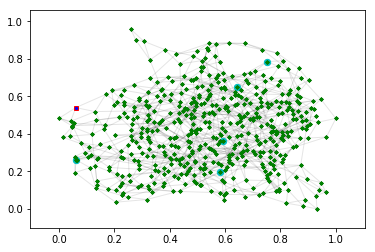

Starting infection


----DONE


In [26]:
#Run the simulation

figureList = list()
# Parameters definition
numRumors = 20
maxThreshold = 1
numMonitors = 5
propagProba = 0.2
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100

j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)
fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')
print("Starting infection")
infections = [[] for n in range(numRumors)]
infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    #fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
print("----DONE")
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))

In [27]:
# Find the maximum number of steps :
maxStep = -1
for step in monitorTrigger2:
    if step[2] > maxStep :
        maxStep = step[2]
        
        
# create array for each monitoring node
HistoDict = dict()

#Fill in the array
for monitor in monitorsList :
    HistoDict[monitor] = np.zeros((maxStep+1,1))
    for elem in monitorTrigger2 :
        if monitor == elem[0] :
            HistoDict[monitor][elem[2]] += 1
    HistoDict[monitor] = np.cumsum(HistoDict[monitor])

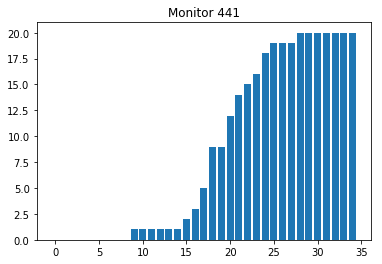

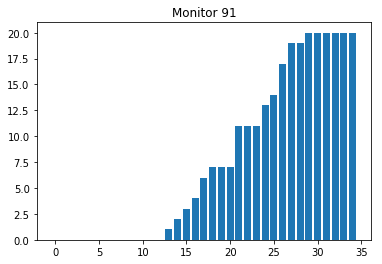

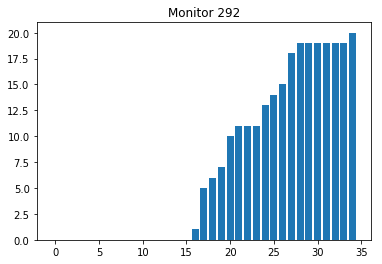

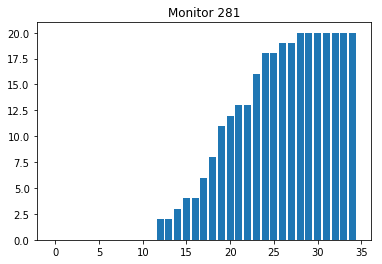

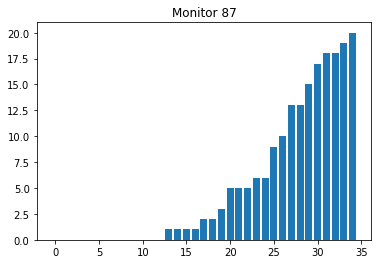

In [28]:
for m in monitorsList :
    plt.bar(range(0,maxStep+1),HistoDict[m])
    plt.title("Monitor "+str(m))
    plt.show()